# 微分方程式モデル

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import scipy as sp
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import curve_fit

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'MS Gothic'

本章の内容は，文献{cite}`Kawamura2021,Endo2017,Odaka2018,Hashimoto2021` を主に参考にしている．

## 微分方程式とは？

### 微分方程式の定義

独立変数を $ t $，その従属変数を $ x(t) $ とする．
このとき，$ x $ の $ t $ による微分を含む方程式を**微分方程式**と呼ぶ．
例えば，以下は微分方程式の例である：

\begin{align*}
    \frac{dx}{dt} &= 2t \\[10pt]
    m\frac{d^2x}{dt^2} &= -mg-k\left(\frac{dx}{dt}\right)^2 \\
\end{align*}

微分方程式は高階の微分を含んでいても良い．最も高次の微分の次数は**微分方程式の階数**と呼ばれる．
また，$ x $ と $ x $ の微分が全て1次式である場合を**線形微分方程式**，それ以外を**非線形微分方程式**と呼ぶ．
例えば，上の式は，線形の1階微分方程式と非線形の2階微分方程式である．
なお，微分方程式には，独立変数が1つである**常微分方程式**と独立変数が複数ある**偏微分方程式**があるが，本章では常微分方程式のみを扱う．

微分方程式は2次方程式や連立方程式などの他の方程式のように解を求めることができる．
微分方程式において解を求めるとは，与えられた微分方程式を満たすような関数 $ x(t) $ を求めることを指し，これを**微分方程式を解く**という．

微分方程式を解く方法は主に２つ存在する．
１つ目は数式の変形だけを使って解く方法で，これを**解析的に解く**という．
一般に，微分方程式が与えられたときにそれを解析的に解くのは困難であることが多く，非線形の微分方程式や偏微分方程式の場合は特に難しい．
そこで，このような場合には２つ目の方法として，微分方程式を離散化してコンピュータ等で解を求める方法がある．
これを**数値的に解く**という．
数値解には必ず誤差が含まれるため，誤差を小さくするための様々なアルゴリズムが提案されている．

以下では解析的に解ける微分方程式の例をいくつか紹介する．
また，Pythonを使って微分方程式を数値的に解く方法についても紹介する．

### 簡単な微分方程式

$ t $ を時刻，$ x(t) $ を時刻 $ t $ における物体の位置とすると，物体の速度 $ v(t) $ は 

$$ 
    v(t) = \lim_{t\to 0} \frac{x(t+\Delta t) - x(t)}{\Delta t} = \frac{dx}{dt}
$$ 

で与えられる．
いま，速度が一定値 $ v_{0} $ であると仮定すると，

$$
    \frac{dx}{dt} = v_{0} 
$$

が成り立つ．
このように，直線上を等速で運動するような運動を**等速直線運動**と呼ぶ．

この微分方程式の解を求めるには， $ t $ で微分して一定値 $ v_{0} $ になるような $ x(t) $ を求めれば良い．
このような $ x(t) $ は $ v_{0} $ を $ t $ で不定積分すれば求まる：

$$
    \int \frac{dx}{dt} dt = \int v_{0} dt \\[10pt]
    x(t) = v_{0} t + C
$$

ここで，$ C $ は積分定数であるが，$ t=0 $ の位置を $ x(0)=x_{0} $ とすると，$ C=x_{0} $ となる．
よって，微分方程式の解は，

$$
    x(t) = v_{0} t + x_{0}
$$

と表される．
このように，$ v_{0},\ x_{0} $ のような未知定数を含む解を**一般解**と呼ぶ．
一方，初期位置が $ x_{0}=0 $，初速が $ 2 $ m/s であるとすると，$ x(t)=2t $ となる．
このように，未知定数に具体的な値を代入して得られる解を**特殊解**と呼ぶ．
<!-- 以上のように，時間 $ t $ を独立変数とする微分方程式に対し，$ t=0 $ のときの条件（**初期条件**）を用いて解を求めることを**初期値問題**と呼ぶ． -->

## 人口の増加

個体数の増減に関する現象は，実社会から自然界まで幅広く存在する．
例えば，今後数十年で国の人口がどのように増減するかを予測することは，国家レベルで議論するべき大問題である．
また，自然界においても，様々な生物種の個体数がどのように増減するか分かれば，食物連鎖のダイナミクスを理解したり，獣害に関する対策を立てたりするのに役立つ．
個体数の増減は，微分方程式で記述される現象の典型例であり，微分方程式の基礎を理解するのにも適した問題である．

### マルサスモデル

時刻 $ t $ におけるある国の総人口を $ N(t) $ とすると，人口の変化率は $ dN(t)/dt $ と表される．
経済学者のマルサス（Thomas Robert Malthus）は，人口の変化率がそのときの人口に比例すると考え，以下のようなモデルを提案した：

$$
	\frac{dN}{dt} = \alpha N(t)
$$

ここで，$ \alpha $ は人口の変化率を決める定数である．
この式は1階微分方程式であり，**マルサスモデル**と呼ばれる．

マルサスモデルは，右辺を直接 $ t $ で積分することができない．
そこで，次のように独立変数 $ t $ と従属変数 $ N(t) $ を左辺と右辺に分離してみる：

$$
	\frac{1}{N} dN = \alpha dt
$$

このような変数の分離が可能な微分方程式は，**変数分離形**と呼ばれ，変数分離することで両辺をそれぞれの変数で積分することが可能となる．
実際に両辺を不定積分すると，

$$
	\int \frac{1}{N} dN = \int \alpha dt
$$

より

$$
	\ln N = \alpha t + C
$$

となるので，

$$
	N(t) = \mathrm{e}^{\alpha t + C}
$$

を得る．
また，$ N(t) $ の初期条件を $ t=0 $ で $ N(0)=N_{0} $ とすると

$$
	N(0) = \mathrm{e}^{C} = N_{0}
$$

となるので，一般解は

$$
	N(t) = N_{0} \mathrm{e}^{\alpha t}
$$

となる．

マルサスモデルの解は $ N(t) $ が $ t $ の関数として表されているので，初期時刻での人口 $ N_{0} $ を与えれば，その後の任意の時刻において人口を予測できる．
マルサスモデルの特徴は，人口が指数関数的に際限なく増加する点であり，人口増加の初期段階では実データとよく合う．
なお，$ \alpha < 0 $ の場合には指数関数的な減少を表すことになる．
この場合は，放射性元素の崩壊や，ある種の病気の感染者数の減少などを表すモデルとして使われる．

### ロジスティックモデル

マルサスモデルでは，指数関数的な増加がいつまでも続くが，人口が増えすぎると環境的な要因や政治的な要因によって人口の増加を抑制する効果がはたらくのが自然である．
このような考察から，より現実に即したモデルとしてVerhulstによって導入されたのが以下の微分方程式である：

$$
	\frac{dN}{dt} = r \left(1 - \frac{N(t)}{N_{\infty}}\right)N(t)
$$

ここで，$ r,\ N_{\infty} $ は定数である．
このモデルは**ロジスティックモデル**と呼ばれる．
ロジスティックモデルは，マルサスモデルの $ \alpha $ を以下のように置き換えた形になっている：

$$
	\alpha \rightarrow r \left(1 - \frac{N(t)}{N_{\infty}}\right)
$$

このような拡張により，個体数 $ N(t) $ が $ N_{\infty} $ に近づくにつれて増加率が減少するという増加率の抑制効果を実現している．

ロジスティックモデルは右辺が非線形な関数となっているが，これも変数分離形なのでマルサスモデルと同じように解くことができる．
まず，微分方程式を以下のように変形する：

$$
	\frac{dN}{N(1 - N/N_{\infty})} = r dt
$$

ここで，左辺の被積分変数を部分分数分解すると，

$$
	\left[\frac{1}{N} - \frac{1/N_{\infty}}{(1-N/N_{\infty})}\right]dN = r dt
$$

となる．
これより，両辺を不定積分することができて，

\begin{align*}
	\int\left[\frac{1}{N} - \frac{1/N_{\infty}}{(1-N/N_{\infty})}\right]dN &= \int r dt \\[10pt]
	\ln \left(\frac{N}{1-N/N_{\infty}}\right) &= r t + C
\end{align*}

となる．
さらに，初期条件として　$ t=0 $　で　$ N(0)=N_{0} $　とすれば，最終的に

$$
	N(t) = \frac{N_{\infty}}{1+[(N_{\infty}/N_{0})-1]\mathrm{e}^{-r t}}
$$

という一般解を得る．

得られた一般解は**ロジスティック関数**または**ロジスティック曲線**と呼ばれ，下図のような時間変化となる．
初期の個体数が $ N_{0} < N_{\infty} $ を満たす場合には，最初は指数関数的な増加を示すが，次第に増加率が小さくなっていき，最終的には $ N_{\infty} $ に収束する．
この意味で，$ N_{\infty} $ は人口の上限を表す定数であることが分かる．
一方，$ N_{0} > N_{\infty} $ の場合には指数関数的な減少を示すが，この場合にも最終的には $ N_{\infty} $ へと収束する．
なお，ロジスティック関数の特別な場合である $ f(x) = 1/(1+\mathrm{e}^{-rx}) $ は**シグモイド関数**と呼ばれ，機械学習の分野でよく使われる．

実社会における人口の増加はマルサスモデルよりもロジスティックモデルに近いふるまいをする．
特に微生物などの場合には，環境をコントロールした実験によって，その増殖の仕方がロジスティックモデルによく従うことが分かっている．
また，感染症のモデルとして知られるSIモデル（未感染者が感染者と接触すると一定の確率で感染するモデル）は感染者数の増減がロジスティックモデルに従う．
さらに，家電の普及率など，近似的にロジスティックモデルで記述できる現象は多く存在する．

生物集団における個体数変化のモデルをより現実に近づけるためには，多数の生物種の間の捕食・被食関係を考慮する方法が考えられる．
このようなモデルの中で単純なものとして，2種の生物間の相互作用を考慮した**ロトカ・ヴォルテラモデル**が知られている．

In [2]:
# ロジスティック関数の定義
def logistic_func(t, N0=1, r=1, N_inf=1000): 
    return N_inf * (1+(N_inf/N0-1)*np.exp(-np.clip(r*t, -709, 100000)))**(-1)

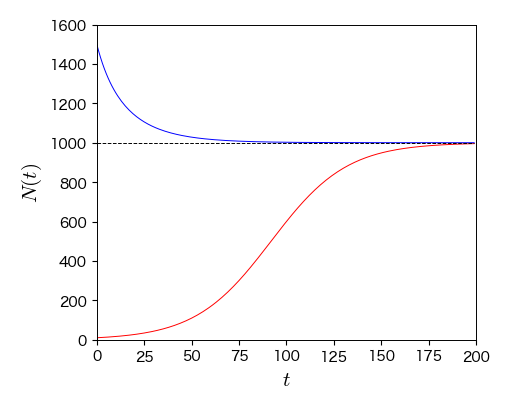

In [5]:
fig, ax = plt.subplots(figsize=(5, 4))
t = np.arange(200)
ax.plot(t, logistic_func(t, N0=10, r=0.05, N_inf=1000), 'r-')
ax.plot(t, logistic_func(t, N0=1500, r=0.05, N_inf=1000), 'b-')
ax.plot(t, np.full_like(t, 1000), '--')

ax.set_xlim(0, 200), ax.set_ylim(0, 1600); 
ax.set_xlabel('$t$', fontsize=15)
ax.set_ylabel('$N(t)$', fontsize=15);

改めて，韓国における新型コロナウイルス感染者数の推移データ（[covid19_korea.csv](https://tnarizuka.github.io/modeling_simulation/chap_5/covid19_korea.csv)）を調べてみよう．
このデータを読み込み，横軸に2020年1月22日を0日とした経過日数，縦軸に感染者数を取った散布図を50日目までと100日目までに分けて描くと，いずれもロジスティック関数のような変化となる．
そこで，$ N_{0},\ N_{\infty}, r $ をフィッティングパラメータとして最小二乗法でフィッティングを行うと，以下のような結果が得られる．
50日目まではほぼロジスティック関数に従っているが，50日目以降で増加の仕方に変化があり，ロジスティック関数からのズレが見られることが分かる．

※ 本データの出典：[John Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

[6.44366499e-03 3.55899263e-01 7.94804311e+03]
[4.72306261e+00 1.79595905e-01 1.01973759e+04]


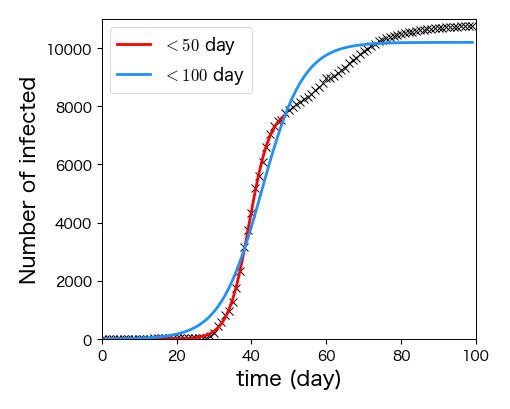

In [6]:
# データの読み込み
data = pd.read_csv('./covid19_korea.csv', header=0)

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(data.index[:100], data['num'][:100], 'x', ms=6)

for tmax in [50, 100]:
    t, Nt = data.index[:tmax], data['num'][:tmax] 
    p_opt = curve_fit(logistic_func, t, Nt)[0]
    print(p_opt)
    ax.plot(t, logistic_func(t, p_opt[0], p_opt[1], p_opt[2]), '-', lw=2, label='$<%s$ day' % tmax)

ax.set_xlim(0, 100), ax.set_ylim(0, 11000)
ax.set_xlabel('time (day)', fontsize=15); ax.set_ylabel('Number of infected', fontsize=15)
ax.legend(loc='upper left', fontsize=12);

## 微分方程式の数値計算

### オイラー法による数値計算

マルサスモデルやロジスティックモデルのように解析的に解ける微分方程式は限られている．
そこで，微分方程式を解くもう一つの方法である数値解法が必要となる．
数値解法は，非線形項を含む微分方程式や偏微分方程式などに対しても解を求めることができるが，あくまでも近似的な解であることに注意する必要がある．
ここでは次のような１階微分方程式を対象とする：

\begin{align*}
    \frac{du}{dt} &= g(t, u(t)) \\[10pt]
    u(0) &= u_{0}
\end{align*}

ここで，$ g(t, u(t)) $ は独立変数 $ t $ と従属変数 $ u(t) $ の任意関数であり，マルサスモデルやロジスティックモデルはいずれもこの形に帰着できる．

この微分方程式をコンピュータで数値的に扱うには微分の計算

$$
    \frac{du}{dt} = \lim_{\Delta t \to 0} \frac{u(t+\Delta t) - u(t)}{\Delta t}
$$

を実行する必要があるが，コンピュータ上で $ \Delta t $ を厳密に0にすることはできない．
しかし，$ \Delta t $ を十分に小さくとれば，微分の近似値として十分に精度の高い値を得ることができる．
そこで，元の微分方程式を以下のように置き換えてみる：

$$
    \frac{u(t+\Delta t) - u(t)}{\Delta t} = g(t, u(t)) \\[10pt]
$$

さらに，$ u(t+\Delta t) $ だけを左辺に残すと次の式を得る：

$$
    u(t+\Delta t) = u(t) + g(t, u(t))\Delta t
$$

この式は $ u(t) $ から次の時刻の $ u(t+\Delta t) $ を求める漸化式と見なすことができる．
よって，初期条件 $ u(0) $ から $ u(\Delta t) $ を求め，さらに $ u(2\Delta t) $ を求めていけば， $ \Delta t $ 刻みで様々な時刻の $ u(t) $ を求めることができる．

以上の方法は**オイラー法**と呼ばれ，微分方程式の数値解法の中で最も基本的なアルゴリズムである．
オイラー法は $ \Delta t $ を小さくとると精度が向上するが，その分計算量が増えてしまうという欠点がある．
そこで，ホイン法やルンゲクッタ法などより精度の高い方法が数多く提案されている．

<!-- オイラー法をPythonで実装するために，式の整理をしておこう．
まず，$ 0\sim t $ の時刻を $ \Delta t $ の間隔で $ n $ 個に分割すると，

$$
    0, \Delta t, 2\Delta t, \cdots, (n-1)\Delta t, n\Delta t
$$

となる．
そこで，離散化した時刻を順に $ t_{0},\ t_{1},\ \cdots, t_{n} $ とすれば， $ t_{n} = n\Delta t $ が成り立つ．
このとき，離散化した従属変数を $ u(t_{n}) = u_{n} $ と表記すれば，微分方程式は以下のように表すことができる：

\begin{align*}
    u_{n+1} &= u_{n} + \Delta t g(t_{n}, u_{n})
\end{align*} -->

**マルサスモデル**

マルサスモデル

$$
	\frac{dN}{dt} = \alpha N(t)
$$

をオイラー法で離散化すると， $ g(t, N(t)) = \alpha N(t) $ として，次の式が得られる：

$$
    N(t+\Delta t) = N(t) + \alpha N(t)\Delta t
$$

実際に数値計算すると，時間刻み $ \Delta t $ を小さくするほど厳密解に近づくことが分かる．

In [7]:
# オイラー法で離散化したマルサスモデル
def g_malthus(t, n, a=2):
    return a*n

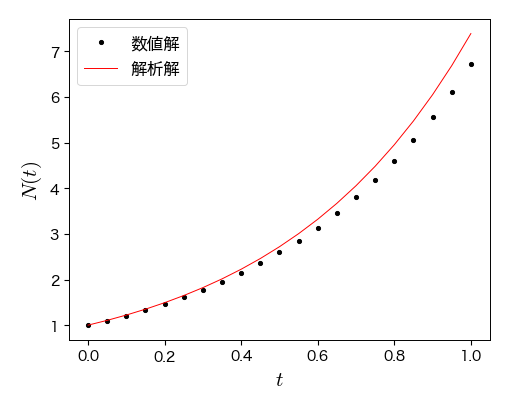

In [8]:
dt = 0.05 # 時間刻み
T = [0] # 独立変数を格納するリスト
N = [1] # 従属変数を格納するリスト

# 数値計算
t = T[0]; n = N[0] # 初期値
while t < 1:
    # オイラー法による更新
    t = t + dt
    n = n + dt * g_malthus(t, n, a=2)
    T.append(t); N.append(n) # 更新結果をリストに追加

# リストをnumpy配列に変換
T = np.array(T); N = np.array(N)

# グラフの描画
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T, N, 'o', ms=3, label='数値解') # 数値解
ax.plot(T, np.exp(2*T), 'r-', label='解析解'); # 解析解

ax.legend(loc='upper left', fontsize=12)
ax.set_xlabel('$t$', fontsize=15)
ax.set_ylabel('$N(t)$', fontsize=15);

**ロジスティックモデル**

ロジスティックモデル

$$
	\frac{dN}{dt} = r \left(1 - \frac{N(t)}{N_{\infty}}\right)N(t)
$$

をオイラー法で離散化すると， $ g(t, N(t)) = r\left(1 - \frac{N(t)}{N_{\infty}}\right)N(t) $ として，次の式が得られる：

$$
    N(t+\Delta t) = N(t) + r\left(1 - \frac{N(t)}{N_{\infty}}\right)N(t)\Delta t
$$

この場合も時間刻み $ \Delta t $ を小さくすると数値解と厳密解がよく一致することが分かる．
一方，$ \Delta t $ を大きくしていくと，マルサスモデルの場合とは異なった振る舞いが見られる．
詳しくは，演習問題に譲るとして，ロジスティックモデルにはオイラー法が全く役に立たないことが分かる．
実は，ロジスティック方程式をオイラー法で離散化した方程式は**ロジスティック写像**と呼ばれており，**周期倍分岐**と呼ばれる特異な振る舞いをすることが知られている．
特に，パラメータ（今の場合は $ 1+ r\Delta t $ ）がある値（3.5699456...）を超えると，特定の周期を持たない非常に複雑な振る舞いを示す．
これは，**カオス**の一例として知られている．

In [ ]:
# オイラー法で離散化したロジスティックモデルの定義
def g_logistic(t, n, r=1, N_inf=1000):
    return r*(1-n/N_inf)*n

In [10]:
# ロジスティック関数の定義
def logistic_func(t, N0, r=1, N_inf=1000): 
    return N_inf * (1+(N_inf/N0-1)*np.exp(-np.clip(r*t, -709, 100000)))**(-1)

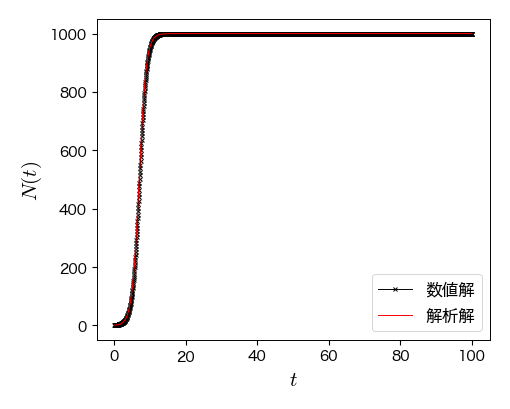

In [12]:
dt = 0.05 # 時間刻み
T = [0] # 独立変数を格納するリスト
N = [1] # 従属変数を格納するリスト

# 数値計算
t = T[0]; n = N[0] # 初期値
while t < 100:
    # オイラー法による更新
    t = t + dt
    n = n + dt * g_logistic(t, n, r=1, N_inf=1000)
    T.append(t); N.append(n) # 更新結果をリストに追加

# リストをnumpy配列に変換    
T = np.array(T); N = np.array(N)

# 数値解の描画
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(T, N, '-x', ms=3, label='数値解') # 数値解

# 厳密解（ロジスティック関数）の描画
T2 = np.linspace(0, 100, 1000)
ax.plot(T2, logistic_func(T2, N[0], r=1, N_inf=1000), 'r-', label='解析解')

ax.legend(loc='best', fontsize=12)
ax.set_xlabel('$t$', fontsize=15)
ax.set_ylabel('$N(t)$', fontsize=15);

### scipy.integrate.solve_ivpによる数値計算

精度が良く高速な数値アルゴリズムは数多く開発されているが，これらを実装するのは容易ではない．
そこで，通常は数値計算用のライブラリを使うのが一般的である．
ここでは，`scipy.integrate.solve_ivp`を用いて，様々な常微分方程式を解く方法を紹介する．
<!-- なお，`scipy.integrate.odeint`も同様の機能を備えているが，現在は`solve_ivp`の使用が推奨されている． -->

まずは，以下のように`solve_ivp`をインポートしておく．

In [13]:
from scipy.integrate import solve_ivp

`solve_ivp`は以下のような形式の連立常微分方程式を解くことができる：

\begin{align*}
    \frac{dx}{dt} &= f(t, x, y,\ldots) \\[10pt]
    \frac{dy}{dt} &= g(t, x, y,\ldots) \\[10pt]
    \vdots \\[10pt]
\end{align*}

ただし，初期条件を $ x(t_0) = x_0,\ y(t_0) = y_0, \ldots $ とする．

`solve_ivp`は以下のように実行する：

>```python
>sol = solve_ivp(func, t_span, y0, method, t_eval, args)
>```

それぞれの引数の意味は以下の通りである：

| 引数 | 意味 | 例 |
|:---|:---| :---|
| `func` | 微分方程式の右辺を定義した関数 | func(t, x, y, ..., params) |
| `t_span` | 数値解を求める時間範囲 | `[t_min, t_max]` |
| `y0` | 初期値 | `[1, 0]` |
| `method` | 数値解を求めるためのアルゴリズム | `'RK45'`, `'RK23'`, `'DOP853'`, `'Radau'`, `'BDF'` |
| `t_eval` | 数値解を求める時間 | np.arange(t_min, t_max, dt) |
| `args` | `func`に渡す引数 |  |

戻り値`sol`には微分方程式の解が格納されており，以下のようにアクセスできる：

| 要素 | 意味 | 
|:---|:---| 
| `sol.t` | 微分方程式の解を求めた時刻を格納した配列 |
| `sol.y[0]` | 1つ目の従属変数の解を格納した配列 |
| `sol.y[1]` | 2つ目の従属変数の解を格納した配列 |

#### 例）マルサスモデル

$$
	\frac{dN}{dt} = \alpha N(t)
$$

オイラー法の場合は時間刻みを大きくすると解析解から大幅にずれるが，`solve_ivp`を用いると，時間刻みが粗くても解析解に近い振る舞いを示すことが分かる．

In [14]:
# マルサスモデルの微分方程式の定義
def ode_malthus(t, N, a):
    dNdt = a*N

    return [dNdt]

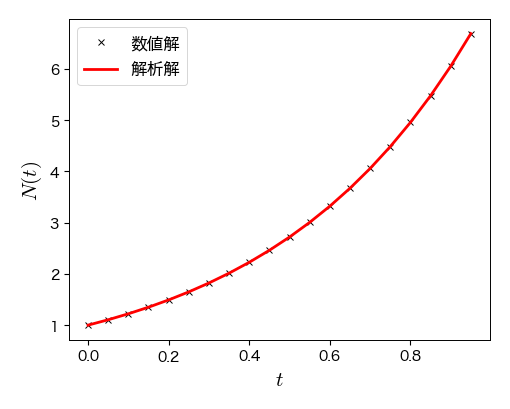

In [15]:
# パラメータと初期条件
a = 2   # パラメータ
N0 = [1]  # 初期値

# 数値計算
t = np.arange(0, 1, 0.05)
sol = solve_ivp(ode_malthus, [t[0], t[-1]], N0, method='RK45', t_eval=t, args=[a])

# グラフの描画
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(sol.t, sol.y[0], 'x', label='数値解') # 数値解
ax.plot(sol.t, N0*np.exp(a*sol.t), lw=2, label='解析解'); # 解析解

ax.legend(loc='best', fontsize=12)
ax.set_xlabel('$t$', fontsize=15)
ax.set_ylabel('$N(t)$', fontsize=15);

#### 例）ロジスティックモデル

$$
	\frac{dN}{dt} = r \left(1 - \frac{N(t)}{N_{\infty}}\right)N(t)
$$

オイラー法の場合は時間刻みを大きくすると解析解から大幅にずれるが，`solve_ivp`を用いると，時間刻みが粗くても解析解に近い振る舞いを示すことが分かる．

In [16]:
# ロジスティックモデルの微分方程式の定義
def ode_logistic(t, N, r=1, N_inf=1000):
    dNdt = r * (1 - N / N_inf) * N

    return [dNdt]

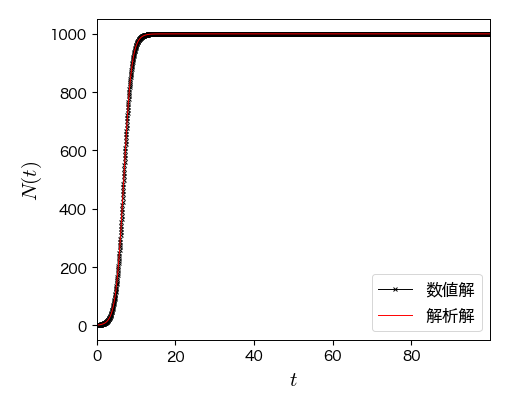

In [17]:
# パラメータと初期条件
dt = 0.05
r, N_inf = 1, 1000  # パラメータ
N0 = [1]  # 初期値

# 数値計算
t = np.arange(0, 100, dt)
sol = solve_ivp(ode_logistic, [t[0], t[-1]], N0, args=[r, N_inf], method='RK45', t_eval=t)

# グラフの描画
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(sol.t, sol.y[0], '-x', ms=3, label='数値解') # 数値解

# 解析解
ax.plot(t, logistic_func(t, N0[0], r=1, N_inf=1000), 'r-', label='解析解')

ax.set_xlim(0, t[-1])
ax.legend(loc='best', fontsize=12)
ax.set_xlabel('$t$', fontsize=15)
ax.set_ylabel('$N(t)$', fontsize=15);

#### 例）斜方投射の軌道

位置 $ (x_{0}, y_{0}) $ から角度 $ \theta $ の方向に初速 $ v_{0} $ で質量 $ m $ の物体を投げたときの運動を考える．
これを斜方投射と呼ぶ．
物体には重力だけがはたらくとすると，物体の運動は以下の微分方程式（運動方程式）で表される：

\begin{align*}
    m\frac{d^{2}x}{dt^2} &= 0 \\[10pt]
    m\frac{d^{2}y}{dt^2} &= -mg
\end{align*}

この微分方程式は解析的に解くことができ，解析解は次のように表される：

\begin{align*}
    x(t) &= x_{0} + v_{0}\cos\theta\cdot t \\[10pt]
    y(t) &= y_{0} - \frac{1}{2}gt^{2}+v_{0}\sin\theta \cdot t
\end{align*}

※ 解析解はそれぞれの微分方程式を2回積分すれば得られる．

**微分方程式の数値解を求める**

この微分方程式は2階微分方程式なので，このままだと`solve_ivp`で数値的に解くことができない．
そこで，まずは $ \frac{dx}{dt}=v_{x},\ \frac{dy}{dt}=v_{y} $ と置いて，以下のように変形する：

\begin{align*}
    \frac{dx}{dt} &= v_{x} \\[10pt]
    \frac{dy}{dt} &= v_{y} \\[10pt]
    m\frac{dv_{x}}{dt} &= 0 \\[10pt]
    m\frac{dv_{y}}{dt} &= -mg
\end{align*}

このように変形すれば，解くべき式は4変数の1階微分方程式となるので，`solve_ivp`が適用できる．

In [21]:
# 斜方投射の運動方程式の定義
def ode_projectile(t, var, g=9.81):
    '''
    斜方投射の運動方程式
    '''
    x, y, vx, vy = var
    dxdt = vx
    dydt = vy
    dvxdt = 0
    dvydt = -g
    
    return [dxdt, dydt, dvxdt, dvydt]

In [22]:
# パラメータ
g = 9.81 # 重力加速度 [m/s^2]

# 初期条件
x0, y0 = 0, 0  # 初期位置を原点とする
v0, ag0 = 30, np.radians(15)  # 初速 [m/s]，投射角 [rad]
var0 = [x0, y0, v0*np.cos(ag0), v0*np.sin(ag0)] # [x0, y0, vx, vz]

# solve_ivpによる数値計算
t = np.arange(0, 10, 0.01)
sol = solve_ivp(ode_projectile, [t[0], t[-1]], var0, method='RK45', t_eval=t, args=[g])

In [23]:
# 数値解の表示
df = pd.DataFrame({'t': sol.t, 'x': sol.y[0], 'y': sol.y[1], 'vx': sol.y[2], 'vy': sol.y[3]})
df.head()

,t,x,y,vx,vy
0,0.00,0.000000,0.000000,28.977775,7.764571
1,0.01,0.289778,0.077155,28.977775,7.666471
2,0.02,0.579555,0.153329,28.977775,7.568371
3,0.03,0.869333,0.228523,28.977775,7.470271
4,0.04,1.159111,0.302735,28.977775,7.372171


**アニメーション**

In [24]:
from matplotlib.animation import FuncAnimation

In [25]:
# 描画結果の出力先を別ウインドウとする
# 元に戻すには %matplotlib inline を実行する
%matplotlib tk

In [27]:
# アニメーションの設定
def update(i, x, y):

    line.set_data(x[:i], y[:i])

    return [line]

# グラフの設定
fig, ax = plt.subplots(figsize=(7, 4))
line, = ax.plot([], [], '-', lw=2)

# ax.set_aspect('equal')
ax.set_xlim(0, 100); ax.set_ylim(0, 30)
ax.set_xlabel('$x$ [m]', fontsize=15)
ax.set_ylabel('$y$ [m]', fontsize=15)

# アニメーションの実行
anim = FuncAnimation(fig, update, fargs=[sol.y[0], sol.y[1]],\
                     frames=len(t), blit=True, interval=0, repeat=False)

#### 例）単振り子

最後に，解析的に解けない微分方程式の例として，単振り子を取り上げる．
天井から長さ $ l $ の糸で質量 $ m $ の物体を吊るしたときの静止位置を原点に取る．
糸の垂直線からの角度を $ \phi $ とする．
物体に重力と糸の張力がはたらくとすると，角度 $ \phi $ は次のような微分方程式で記述される：

\begin{align*}
	\frac{d^{2}\phi}{dt^2} = -\frac{g}{l}\sin\phi
\end{align*}

この微分方程式は，$ \sin\phi $ という非線形関数を含むため，解析的に解くことができない（楕円関数を使えば解ける）．
よって，通常は角度が小さい場合を仮定して， $ \sin\phi \approx \phi $ と近似して得られる単振動の微分方程式を解く．

ここでは，`solve_ivp` を使ってこの微分方程式を数値的に解いてみよう．
数値解を求めるにあたり，2階微分方程式を1階微分方程式に変換しておく：

\begin{align*}
	\frac{d\phi}{dt} &= v_{\phi} \\[10pt]
	\frac{dv_{\phi}}{dt} &= -\frac{g}{l}\sin\phi
\end{align*}

微分方程式の数値解を求める

In [28]:
# 単振り子の運動方程式の定義
def ode_simple_pendulum(t, var, g, l):
    '''
    単振り子の運動方程式
    '''
    ag, v = var
    dagdt = v
    dvdt = -(g/l)*np.sin(ag)
    
    return [dagdt, dvdt]

In [34]:
# パラメータ
l = 2    # 糸の長さ
g = 9.8  # 重力加速度

# 初期条件
var0 = np.radians([45, 0]) # [ag0, v0]

# 数値計算
t = np.arange(0, 100, 0.1)
sol = solve_ivp(ode_simple_pendulum, [t[0], t[-1]], var0, method='RK45', t_eval=t, args=[g, l])
x = l*np.sin(sol.y[0])   # x座標
y = l-l*np.cos(sol.y[0]) # y座標

In [35]:
# 数値解の表示
df = pd.DataFrame({'t': sol.t, 'angle': sol.y[0], 'v': sol.y[1]})
df.head()

,t,angle,v
0,0.0,0.785398,0.000000
1,0.1,0.768132,-0.344487
2,0.2,0.716917,-0.676776
3,0.3,0.633602,-0.983938
4,0.4,0.521420,-1.252741


アニメーション

In [31]:
# 描画結果の出力先を別ウインドウとする
# 元に戻すには %matplotlib inline を実行する
%matplotlib tk

In [36]:
# アニメーションの設定
def update_simple_pendulum(i):
    pt.set_data([x[i]], [y[i]])
    line.set_data([0, x[i]], [l, y[i]])
    
    return [pt, line]

# グラフの設定
fig, ax = plt.subplots(figsize=(5, 5))
pt, = ax.plot([], [], 'ko', ms=10)
line, = ax.plot([], [], 'k-', lw=1)

ax.set_aspect('equal')
ax.set_xlim(-l, l); ax.set_ylim(-0.5, 2*l)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)

# 実行
anim = FuncAnimation(fig, update_simple_pendulum, fargs=None,\
                     frames=len(t), blit=True, interval=20, repeat=True);

### 演習問題

**A. オイラー法によるロジスティックモデルの数値計算**

- ロジスティックモデルについて，時間刻み $ \Delta t $ を以下の値に設定してオイラー法で数値計算し， $ N(t) $ の時間変化を可視化せよ．ただし，$ r=1,\ N_{\infty}=1000 $ とせよ．初期値 $ N_{0} $ は任意の値で良い．
  - $ 0 < \Delta t \le 1 $
  - $ 1 < \Delta t \le 2 $
  - $ 2 < \Delta t \le 2.4494879 $
  - $ 2.4494897 < \Delta t \le 2.5699456 $
  - $ 2.5699456 < \Delta t < 3 $
- 以上の結果からオイラー法の問題点を考察せよ．

**B. 空気抵抗を受ける落下運動の終端速度**

空気抵抗を受ける物体の落下運動は，以下の微分方程式で記述される：
  
$$
  m\frac{dv}{dt} = -mg - kv(t)
$$

ここで，$ m $ は物体の質量，$ g $ は重力加速度，$ v(t) $ は時刻 $ t $ における物体の速度，$ k $ は空気抵抗の係数である．

- この微分方程式をオイラー法で数値計算し，物体の速度の時間変化をプロットせよ．
  ただし，$ g=9.81\ \mathrm{m/s^2},\ m=1\ \mathrm{kg},\ k=1\ \mathrm{kg/s} $ とせよ．
  また，初速度は $ v(0)=0\ \mathrm{m/s} $ とせよ．
- 物体の終端速度（ $ t\to \infty $ の速度）の理論値は $ v_{\infty} = -mg/k $ である．
  この値と数値計算で得られた終端速度を比較せよ．

**C. 斜方投射の最適角度**

- 斜方投射の運動方程式を`solve_ivp`で数値計算し，原点 $ (0, 0) $ から初速 $ v_{0}=30\ \mathrm{m/s} $ で投射した場合に最も遠くまで飛ぶ角度を求めよ．